In [1]:
from board import Board
from placement import generate_queen_positions
from scorer import Scorer
from colour import ColourSpread
from visualisation import display_board

def main(n):
    """Generate, fill, and evaluate an N x N board."""
    boards = []
    for i in range(100):
        if i % 10 == 0:
            print(f"Generating board {i}...")
        board = Board(n)
        queen_positions = generate_queen_positions(n)
        board.place_queens(queen_positions)
        board.spread_colours(ColourSpread.random_spread)

        score = Scorer.evaluate_board_fast(board)
        boards.append((board, score))

    return sorted(boards, key=lambda x: x[1])

In [7]:
sorted_boards = main(6)

Generating board 0...
Generating board 10...
Generating board 20...
Generating board 30...
Generating board 40...
Generating board 50...
Generating board 60...
Generating board 70...
Generating board 80...
Generating board 90...


In [8]:
sorted_boards

[(<board.Board at 0x18e33f0bb30>, 1),
 (<board.Board at 0x18e3404c710>, 1),
 (<board.Board at 0x18e3404d370>, 1),
 (<board.Board at 0x18e3404e660>, 1),
 (<board.Board at 0x18e3404eea0>, 1),
 (<board.Board at 0x18e34069250>, 1),
 (<board.Board at 0x18e34091430>, 1),
 (<board.Board at 0x18e340930e0>, 1),
 (<board.Board at 0x18e34093ef0>, 1),
 (<board.Board at 0x18e33efff50>, 2),
 (<board.Board at 0x18e33f3ea50>, 2),
 (<board.Board at 0x18e33f0bef0>, 2),
 (<board.Board at 0x18e33f0b980>, 2),
 (<board.Board at 0x18e33f0bc20>, 2),
 (<board.Board at 0x18e33f08b30>, 2),
 (<board.Board at 0x18e33f09ee0>, 2),
 (<board.Board at 0x18e33f0ad20>, 2),
 (<board.Board at 0x18e33f0aa50>, 2),
 (<board.Board at 0x18e33f0ac90>, 2),
 (<board.Board at 0x18e33f0b500>, 2),
 (<board.Board at 0x18e33f0b800>, 2),
 (<board.Board at 0x18e33f0a570>, 2),
 (<board.Board at 0x18e3404f6b0>, 2),
 (<board.Board at 0x18e3404f0b0>, 2),
 (<board.Board at 0x18e3404c320>, 2),
 (<board.Board at 0x18e3404c770>, 2),
 (<board.Boa

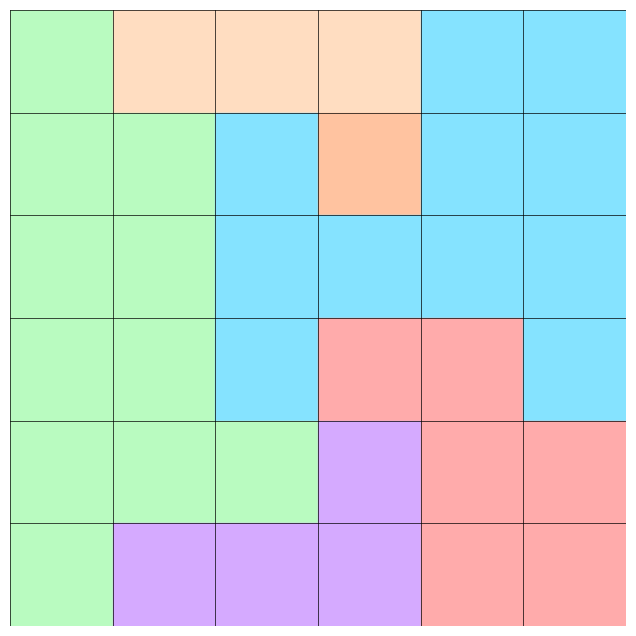

In [9]:
display_board(sorted_boards[0][0].grid)

In [10]:
test = sorted_boards[0][0]

In [15]:
from board import Board
import numpy as np

In [ ]:
def _backtrack(queens_placement: np.ndarray, grid: np.ndarray, found_sols: np.ndarray, row: int) -> True:
    n = queens_placement.shape[0]
    if row >= n:
        found_sols.append(queens_placement.copy())
        return len(found_sols) > 1

    for col in range(n):
        if _is_valid_placement(queens_placement, grid, found_sols, row, col):
            queens_placement[row][col] = 1
            if _backtrack(queens_placement, grid, found_sols, row + 1):
                return True
            queens_placement[row][col] = 0
    return False


def _is_valid_placement(queens_placement: np.ndarray, grid: np.ndarray, row: int, col: int) -> bool:
    colour = grid[row][col]
    check_colour = np.sum([queens_placement[i][j] for i, j in zip(*np.where(grid == colour))]) == 0

    check_queens = not (
        queens_placement[max(row - 1, 0) : row + 2, max(col - 1, 0) : col + 2].any()
        or queens_placement[row].any()
        or queens_placement[:, col].any()
    )

    return check_colour and check_queens


def unique_solution(queens_board: Board) -> np.array:
    queens_placement = np.zeros((queens_board.n, queens_board.n), dtype=int)
    known_solution = np.zeros((queens_board.n, queens_board.n), dtype=int)
    for queen in queens_board.queens:
        known_solution[queen.x, queen.y] = 1
    grid = queens_board.grid.copy()
    # found_sols = [known_solution]
    found_sols = []
    found = _backtrack(queens_placement, grid, found_sols, 0)
    return not found

unique_solution(test)


True

In [13]:
from board import Board
import numpy as np

def _backtrack(queens_placement: np.ndarray, grid: np.ndarray, known_solution: np.ndarray, row: int, found_solutions: list) -> bool:
    n = queens_placement.shape[0]
    if row >= n:
        found_solutions.append(queens_placement.copy())
        return len(found_solutions) > 1

    for col in range(n):
        if _is_valid_placement(queens_placement, grid, known_solution, row, col):
            queens_placement[row][col] = 1
            if _backtrack(queens_placement, grid, known_solution, row + 1, found_solutions):
                return True
            queens_placement[row][col] = 0
    return False

def _is_valid_placement(queens_placement: np.ndarray, grid: np.ndarray, known_solution: np.ndarray, row: int, col: int) -> bool:
    colour = grid[row][col]
    check_colour = np.sum([queens_placement[i][j] for i, j in zip(*np.where(grid == colour))]) == 0

    check_queens = not (
        queens_placement[max(row - 1, 0) : row + 2, max(col - 1, 0) : col + 2].any()
        or queens_placement[row].any()
        or queens_placement[:, col].any()
    )

    new_placement = queens_placement.copy()
    new_placement[row][col] = 1
    check_not_known = not np.array_equal(new_placement, known_solution)

    return check_colour and check_queens and check_not_known

def unique_solution(queens_board: Board) -> bool:
    queens_placement = np.zeros((queens_board.n, queens_board.n), dtype=int)
    known_solution = np.zeros((queens_board.n, queens_board.n), dtype=int)
    for queen in queens_board.queens:
        known_solution[queen.x, queen.y] = 1
    grid = queens_board.grid.copy()
    found_solutions = []
    _backtrack(queens_placement, grid, known_solution, 0, found_solutions)
    return found_solutions


unique_solution(test)

[]

In [11]:
test.grid

array([[6, 1, 1, 1, 5, 5],
       [6, 6, 5, 3, 5, 5],
       [6, 6, 5, 5, 5, 5],
       [6, 6, 5, 2, 2, 5],
       [6, 6, 6, 4, 2, 2],
       [6, 4, 4, 4, 2, 2]])

In [135]:
sorted_boards

[(<board.Board at 0x236fc44d9a0>, 1),
 (<board.Board at 0x236fc44ede0>, 1),
 (<board.Board at 0x236fc456ea0>, 1),
 (<board.Board at 0x236fc33b080>, 2),
 (<board.Board at 0x236fc3a04d0>, 2),
 (<board.Board at 0x236fc471550>, 2),
 (<board.Board at 0x236fc421220>, 2),
 (<board.Board at 0x236fc469400>, 2),
 (<board.Board at 0x236fc456c60>, 2),
 (<board.Board at 0x236fc456060>, 2),
 (<board.Board at 0x236fc4557c0>, 2),
 (<board.Board at 0x236fc41aba0>, 2),
 (<board.Board at 0x236fc476840>, 2),
 (<board.Board at 0x236fc3f59d0>, 2),
 (<board.Board at 0x236fc4541d0>, 2),
 (<board.Board at 0x236fc474800>, 2),
 (<board.Board at 0x236fc474b90>, 2),
 (<board.Board at 0x236fb2dfe00>, 2),
 (<board.Board at 0x236fc456630>, 2),
 (<board.Board at 0x236fc476d80>, 2),
 (<board.Board at 0x236fc457fb0>, 2),
 (<board.Board at 0x236fc474da0>, 2),
 (<board.Board at 0x236fc476030>, 2),
 (<board.Board at 0x236fc477620>, 2),
 (<board.Board at 0x236fc4770b0>, 2),
 (<board.Board at 0x236fc455e20>, 2),
 (<board.Boa